In [24]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df = pd.read_csv('../data/titanic_train.csv')

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# 레코드 수, 컬럼 수 확인
df.shape

(891, 12)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### 불필요한 컬럼 PassengerId, Name, Ticket, Fare 삭제

In [30]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Fare'], axis=1, inplace=True)

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


##### 결측치 처리 : Age - 평균 나이로 대체, Cabin, Embarked - N으로 대체

In [33]:
df['Age'].fillna(float(df['Age'].mean()), inplace=True)
df['Cabin'].fillna('N', inplace=True)
df['Embarked'].fillna('N', inplace=True)

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,N,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,N,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,N,S


##### Cabin 앞 문자열로만 대체

In [35]:
df['Cabin'].value_counts()

N              687
B96 B98          4
G6               4
C23 C25 C27      4
E101             3
              ... 
E40              1
D28              1
A32              1
D45              1
T                1
Name: Cabin, Length: 148, dtype: int64

In [36]:
df['Cabin'].str[0]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [37]:
df['Cabin'] = df['Cabin'].str[0]

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,N,S
1,1,1,female,38.0,1,0,C,C
2,1,3,female,26.0,0,0,N,S
3,1,1,female,35.0,1,0,C,S
4,0,3,male,35.0,0,0,N,S


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Cabin     891 non-null    object 
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


##### 컬럼별 Survived 비율 그래프와 hue='Sex' 추가한 Survived 비율 그래프 그려보기

In [41]:
df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

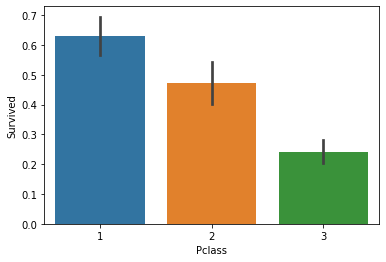

In [48]:
sns.barplot(x='Pclass', y='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

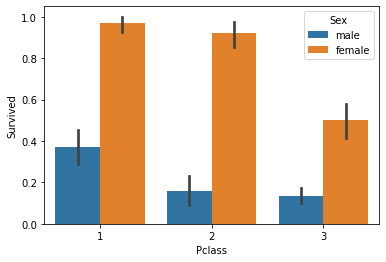

In [51]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)

In [40]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

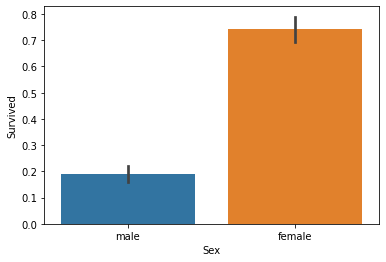

In [53]:
sns.barplot(x='Sex', y='Survived', data=df)

In [42]:
df.groupby(['Age','Survived'])['Survived'].count()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: Survived, Length: 144, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Survived'>

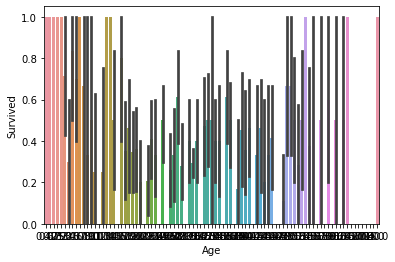

In [55]:
sns.barplot(x='Age', y='Survived', data=df)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

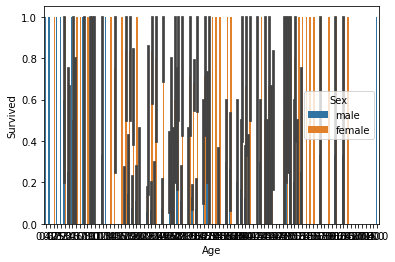

In [63]:
sns.barplot(x='Age', y='Survived', hue='Sex', data=df)

##### * Age는 연령대를 구분해주지 않아 그래프로 확인 불가  *

In [44]:
df.groupby(['SibSp','Survived'])['Survived'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

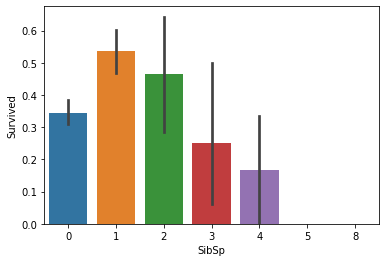

In [56]:
sns.barplot(x='SibSp', y='Survived', data=df)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

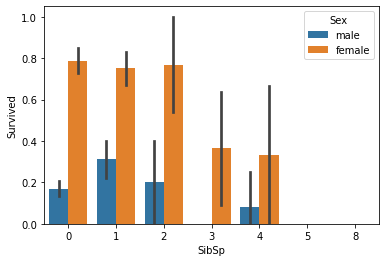

In [57]:
sns.barplot(x='SibSp', y='Survived', hue='Sex', data=df)

In [45]:
df.groupby(['Parch','Survived'])['Survived'].count()

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

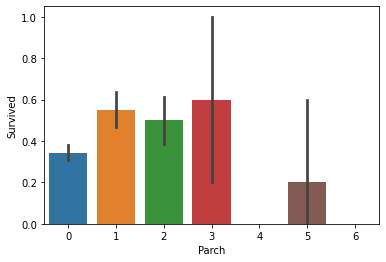

In [58]:
sns.barplot(x='Parch', y='Survived', data=df)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

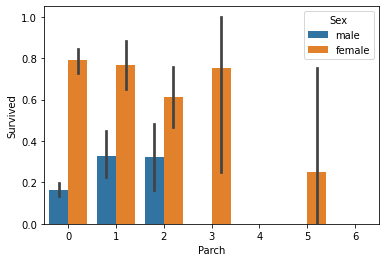

In [60]:
sns.barplot(x='Parch', y='Survived', hue='Sex', data=df)

In [46]:
df.groupby(['Cabin','Survived'])['Survived'].count()

Cabin  Survived
A      0             8
       1             7
B      0            12
       1            35
C      0            24
       1            35
D      0             8
       1            25
E      0             8
       1            24
F      0             5
       1             8
G      0             2
       1             2
N      0           481
       1           206
T      0             1
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

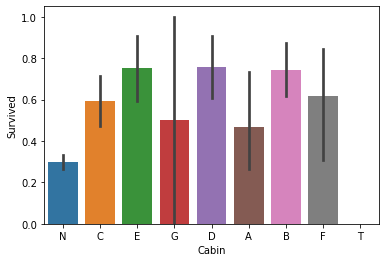

In [61]:
sns.barplot(x='Cabin', y='Survived', data=df)

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

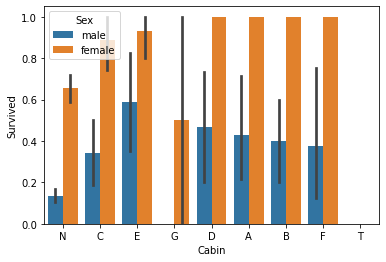

In [62]:
sns.barplot(x='Cabin', y='Survived', hue='Sex', data=df)

##### 문자열 피처를 숫자형으로 변환

In [68]:
from sklearn import preprocessing

def str_change_int(df) :
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features :
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

In [69]:
df = str_change_int(df)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1,22.0,1,0,7,3
1,1,1,0,38.0,1,0,2,0
2,1,3,0,26.0,0,0,7,3
3,1,1,0,35.0,1,0,2,3
4,0,3,1,35.0,0,0,7,3
